This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import scimap
import numpy as np

from scimap.txm.xanes_frameset import fit_whiteline

Center: 8352.3149176
Goodness of fit: 0.002070405398038423


(8340, 8360)

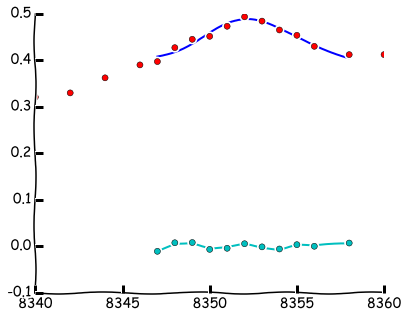

In [2]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum[8347:8358])
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)

# XRD Peak Fitting

Max: 35.1511432389


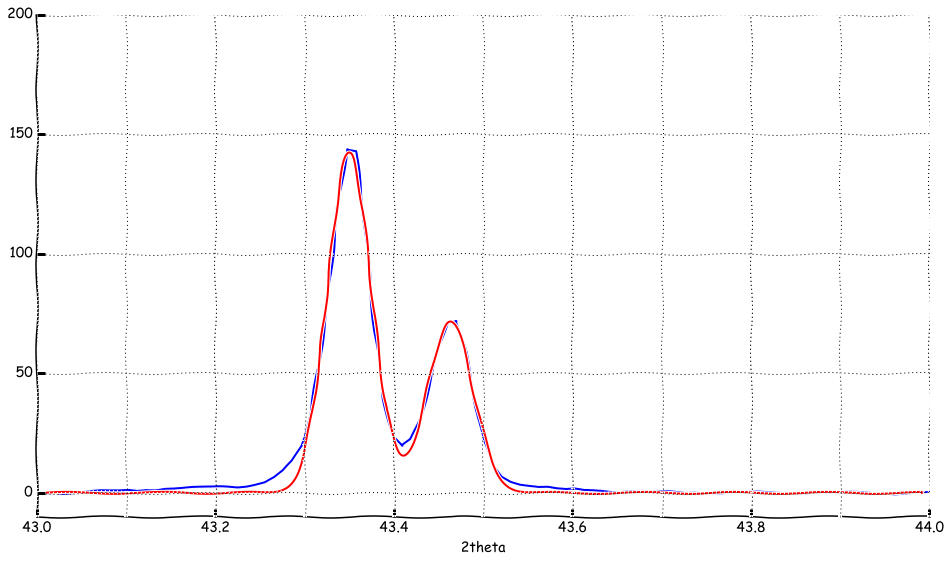

In [4]:
peakScan = scimap.XRDScan('testdata/corundum.xye',
                   phase=scimap.standards.Corundum())
ax = scimap.big_axes()
# Subtract background for plotting
df = peakScan.diffractogram.loc[:, 'counts'] - peakScan.refinement.background
df.plot(ax=ax)

# Run peak refinement
peak = scimap.XRDPeak(reflection=scimap.Reflection('110', (37, 39)),
                      method='gaussian')
peakScan.refinement.refine_background()
df = peakScan.refinement.subtracted[42.5:44]
peak.fit(two_theta=df.index, intensity=df.values)

# Plot resulting fit
peak.plot_fit(ax=plt.gca())
plt.xlim(43, 44); plt.ylim(-10, 200)
plt.gca().grid(True, which="both", linestyle=":", linewidth=1)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Print peak maxima
df2 = peakScan.refinement.subtracted[34:36]
print("Max:", df2.argmax())